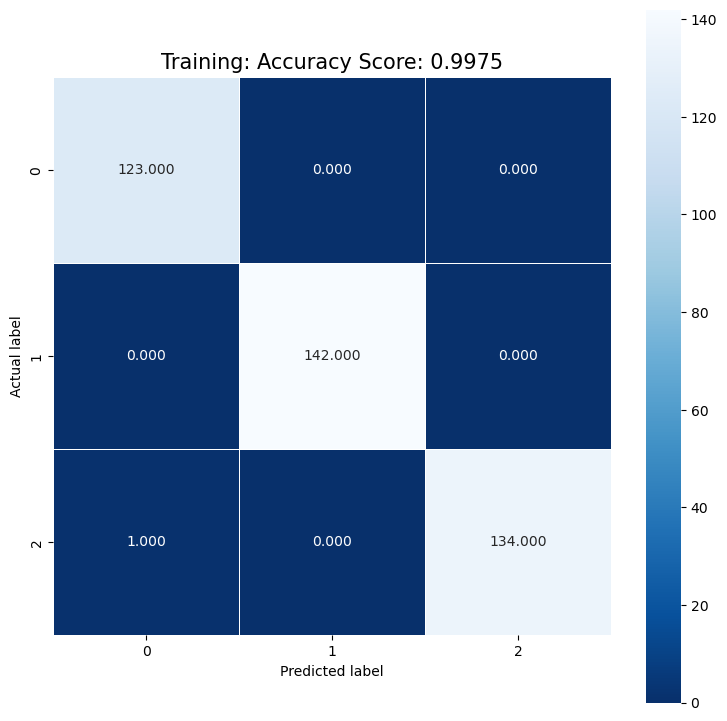

In [1]:
# Read data from external file
import pandas as pd
dfCSV = pd.read_csv("KF5 Training Set.csv")

#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Employment','Gender', 'PriceImportance','QualityImportance','StyleImportance','BrandImageImportance','LocationImportance','PurchasedClothingTypes','PreferredShoppingPlatform','PreferredClothingBrand'
]
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])
    
dfCSV.head()

#Data Slicing
x = dfCSV.drop(['PreferredClothingBrand'], axis = 1)
y = dfCSV.iloc[:, [12]]
x.head()

# Convert dataframe to array
x = x.values
y = y.values
y = y.ravel()

# K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
ModelKITA = KNeighborsClassifier(n_neighbors=11, p=2, weights='distance')

ModelKITA.fit(x, y)
yPred = ModelKITA.predict(x)

# Testing & performance analysis -Training data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y, yPred), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Training: Accuracy Score: {0}'.format(skm.accuracy_score(y, yPred))
plt.title(all_sample_title, size = 15);

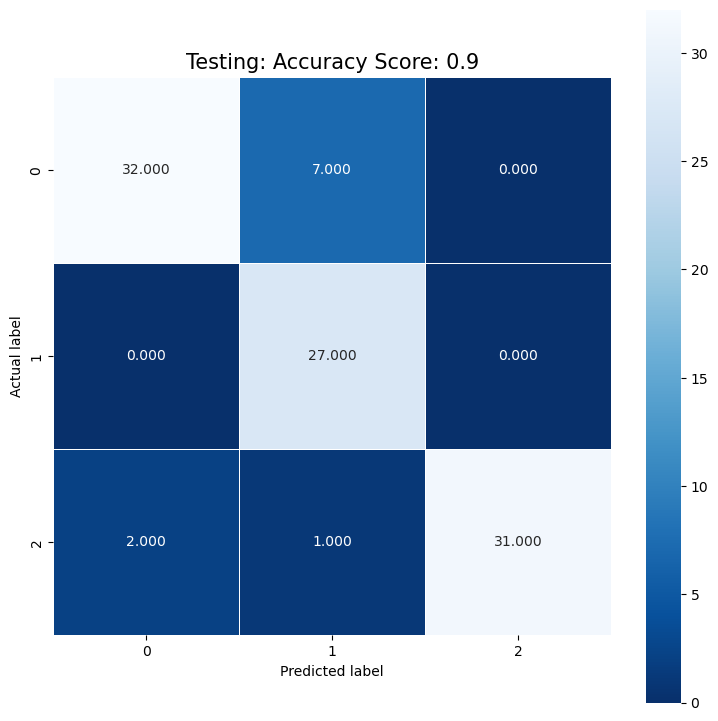

In [2]:
# Read data from external file
import pandas as pd
dfCSV2 = pd.read_csv("KF5 Testing Set.csv")

#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Employment','Gender', 'PriceImportance','QualityImportance','StyleImportance','BrandImageImportance','LocationImportance','PurchasedClothingTypes','PreferredShoppingPlatform','PreferredClothingBrand'
]
le = LabelEncoder()
for i in var_mod:
    dfCSV2[i] = le.fit_transform(dfCSV2[i])
    
dfCSV2.head()

#Data slicing
x2 = dfCSV2.drop(['PreferredClothingBrand'], axis = 1)
y2 = dfCSV2.iloc[:, [12]]
x2.head()

# Convert dataframe to array
x2 = x2.values
y2 = y2.values
y2 = y2.ravel()

yPred2 = ModelKITA.predict(x2)

# Testing & performance analysis -Testing data
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(9,9))
sns.heatmap(skm.confusion_matrix(y2, yPred2), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Testing: Accuracy Score: {0}'.format(skm.accuracy_score(y2, yPred2))
plt.title(all_sample_title, size = 15);

In [3]:
# Read data from external file
import pandas as pd
dfCSV = pd.read_csv("KF5 Training Set.csv")
dfCSV.head()

,Employment,Age,Gender,MonthlyExpenses,ClothesExpenses,PriceImportance,QualityImportance,StyleImportance,BrandImageImportance,LocationImportance,PurchasedClothingTypes,PreferredShoppingPlatform,PreferredClothingBrand
0,Yes,21,Female,500,150,Very important,Moderately important,Very important,Very important,Moderately important,Casual wear,Online shopping,H&M
1,No,22,Female,900,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M
2,Yes,19,Female,780,300,Very important,Moderately important,Very important,Very important,Very important,Casual wear,Online shopping,H&M
3,No,21,Female,780,400,Very important,Moderately important,Moderately important,Very important,Moderately important,Casual wear,Online shopping,H&M
4,No,21,Female,400,210,Very important,Not important,Not important,Not important,Not important,Sports wear,In-store shopping,Brands Outlet


In [4]:
#Data transformation
from sklearn.preprocessing import LabelEncoder
var_mod = ['Employment','Gender', 'PriceImportance','QualityImportance','StyleImportance','BrandImageImportance','LocationImportance','PurchasedClothingTypes','PreferredShoppingPlatform','PreferredClothingBrand'
]
le = LabelEncoder()
for i in var_mod:
    dfCSV[i] = le.fit_transform(dfCSV[i])
    
dfCSV.head()

,Employment,Age,Gender,MonthlyExpenses,ClothesExpenses,PriceImportance,QualityImportance,StyleImportance,BrandImageImportance,LocationImportance,PurchasedClothingTypes,PreferredShoppingPlatform,PreferredClothingBrand
0,1,21,0,500,150,2,0,2,2,0,0,2,1
1,0,22,0,900,300,2,0,2,2,2,0,2,1
2,1,19,0,780,300,2,0,2,2,2,0,2,1
3,0,21,0,780,400,2,0,0,2,0,0,2,1
4,0,21,0,400,210,2,1,1,1,1,2,1,0


In [5]:
# Applying the Classification Model in Application

newData = [[0,25,1,600,200,0,1,2,0,1,2,0]]
predictionResult = ModelKITA.predict(newData);

if(predictionResult == 0):
    print("Prediction result = Brands Outlet")
elif(predictionResult == 1):
    print("Prediction result = H&M")
else:
   print("Prediction result = Uniqlo")

Prediction result = H&M


In [6]:
newData = [[0,23,0,200,50,1,0,1,1,2,1,1]]
predictionResult = ModelKITA.predict(newData);

if(predictionResult == 0):
    print("Prediction result = Brands Outlet")
elif(predictionResult == 1):
    print("Prediction result = H&M")
else:
   print("Prediction result = Uniqlo")

Prediction result = Brands Outlet


In [7]:
newData = [[1,24,1,1000,300,1,2,0,2,0,1,1]]
predictionResult = ModelKITA.predict(newData);

if(predictionResult == 0):
    print("Prediction result = Brands Outlet")
elif(predictionResult == 1):
    print("Prediction result = H&M")
else:
   print("Prediction result = Uniqlo")

Prediction result = Uniqlo
